In [27]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import plot_tree

import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


In [34]:
df= pd.read_csv('C:\\Users\\Orie\\Desktop\\InstituteofData\\ProjectDatasets\\Abalone\\abalone.csv')

In [35]:
# Drop non-Numeric Sex
df.drop(['Sex'], axis=1, inplace=True)

In [36]:
#### Set variables ####

# Target variable:
y= df['Rings']

# Take all columns except target as predictor columns:
predictor_columns = [c for c in df.columns if c != 'Rings']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

In [37]:
#Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)

C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [38]:

# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(X)
 
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.2973269801466436
Mean Squared Error: 0.950438113478573
R-squared: 0.908548207075465


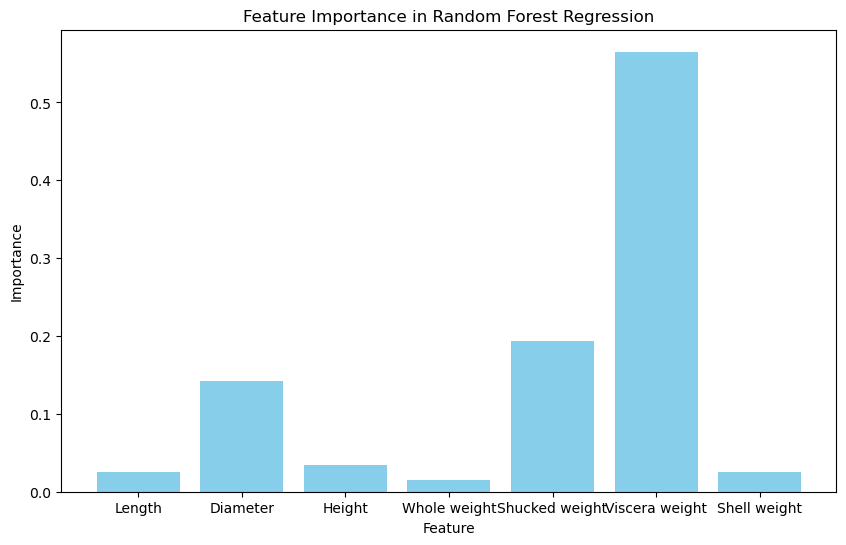

In [44]:

# Create a sample regression dataset with the same number of features
X, y = make_regression(n_samples=100, n_features=len(predictor_columns), noise=0.1)

# Create a DataFrame using predictor_columns as the column names
df = pd.DataFrame(X, columns=predictor_columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

# Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Plot feature importances with feature names as labels
plt.figure(figsize=(10, 6))
plt.bar(predictor_columns, feature_importances, color='skyblue')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Regression")
plt.show()

The Low OOB hints at overfitting. Run Cross-validation to ensure robustness.

In [41]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [42]:
# Initialize data (example)
X = pd.DataFrame(np.random.rand(100, 7), columns=predictor_columns)
y = pd.Series(np.random.rand(100), name='Rings')

# Set up 5-fold cross-validation with shuffling
k_fold = KFold(5, shuffle=True, random_state=0)

# Lists to store results
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# 5-fold cross-validation loop
for k, (train_idx, test_idx) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]

    # Fit the model with the training set
    rf.fit(X_train, y_train)

    # Make predictions with training and test sets
    train_preds = rf.predict(X_train)
    test_preds = rf.predict(X_test)

    # Score R2 and RMSE on training and test sets
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
    
# Create a DataFrame to display R2 and RMSE scores for each fold
metrics_df = pd.DataFrame({
    'Training R2': train_scores,
    'Test R2': test_scores,
    'Training RMSE': train_rmse,
    'Test RMSE': test_rmse,
}, index=[i + 1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.823700,-0.455839,0.113595,0.356195
2,0.818220,-0.406121,0.120151,0.302164
3,0.815265,-0.249906,0.117341,0.329794
4,0.834180,-1.014785,0.115802,0.332775
5,0.817573,-0.095589,0.118008,0.291314
